# Logging in Through my Credentials

In [247]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
driver = webdriver.Chrome(executable_path = 'C:\\Users\\Ajay Singhal\\Desktop\\chromedriver')
def login(usnm,pswd):
    driver.get('https://www.instagram.com/')
    driver.implicitly_wait(10)
    driver.maximize_window()
    username = driver.find_element_by_name('username')
    password = driver.find_element_by_name('password')
    username.send_keys(usnm)
    password.send_keys(pswd)
login('SAMPLE USERNAME','SAMPLE PASSWORD')    
btn = driver.find_element_by_tag_name('button')
btn.submit()
time.sleep(5)

# Defining a search function to search any keyword

In [248]:
def search(tag):
    inptbox = driver.find_element_by_tag_name('input')
    inptbox.send_keys(tag)
    time.sleep(5)
search('food')  

# Defining a function to get links of required number of accounts

In [249]:
def get_links(count):
    links = []
    i = 0
    for link in driver.find_elements_by_xpath('//div[@class = "fuqBx "]/div/a'):
        if i < count:
            if "tags" in str(link.get_attribute('href')):
                i = i
            else:
                links.append((link.get_attribute('href')))
                i = i+1
    return links
all_links = get_links(10)            

# Defining a function to get followers of each account


In [250]:
def follower_count(links):
    pg_flw_count = {}
    flw = 0
    pg = ""
    for i in links:
        driver.get(i)
        time.sleep(2)
        pg = driver.find_element_by_xpath('//div[@class = "nZSzR"]//h2').text
        flw = (driver.find_element_by_xpath('//ul[@class = "k9GMp "]/li[2]//span').get_attribute('title'))
        pg_flw_count[pg] = flw
    return pg_flw_count

# Finding Top5 Accounts on the basis of Followers

In [251]:
fllow_count = follower_count(all_links)
fllow_count_int = {}

In [252]:
for key,value in fllow_count.items():
    value = value.replace(",",'') 
    fllow_count_int[key] = float(value)

In [253]:
import operator
fllow_count_int = dict(sorted(fllow_count_int.items(),key=operator.itemgetter(1),reverse = True))

In [254]:
count = 0
def get_top_x(x,dict_given):
    answer = {}
    i = 0
    for key,value in dict_given.items():
        if i < x:
            answer[key] = value
            i = i+1
        else:
            break  
    return answer        

In [255]:
fllow_count_int = dict(fllow_count_int)
fllow_count_int = get_top_x(5,fllow_count_int)

In [256]:
fllow_count_int

{'foodys': 8759930.0,
 'yourfoodlab': 1622015.0,
 'food': 115558.0,
 'food.darzee': 103490.0,
 'sailusfood': 66251.0}

# Finding number of posts made by Top5 Accounts in last 3 days

In [258]:
no_of_posts = {}
for key,value in fllow_count_int.items():
    time.sleep(3)
    print(key, end=' ')
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    time.sleep(3)
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(key)
    time.sleep(3)
    driver.find_element_by_xpath('//a[@class="-qQT3"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    first_img = driver.find_element_by_xpath('//div[contains(@class,"_9AhH0")]')
    first_img.click()
    time.sleep(3)
    while True:
        time.sleep(5)
        time_string=driver.find_element_by_xpath('//time[contains(@class,"Nzb55")]').get_attribute('innerHTML')
        if time_string[-1] in ['h','s','m']:
            count+=1
        elif time_string[-1]=='d' and int(time_string[:-1])<=3:
            count+=1
        else:
            driver.back()
            break
        next_img = driver.find_element_by_xpath('//a[contains(@class,"coreSpriteRightPaginationArrow")]')
        next_img.click()
        time.sleep(1)
    driver.back()    
    print("have done", count, "posts in past 3 days")
    no_of_posts[key] = count 
            

foodys have done 9 posts in past 3 days
yourfoodlab have done 3 posts in past 3 days
food have done 6 posts in past 3 days
food.darzee have done 10 posts in past 3 days
sailusfood have done 0 posts in past 3 days


# Printing the required graphs

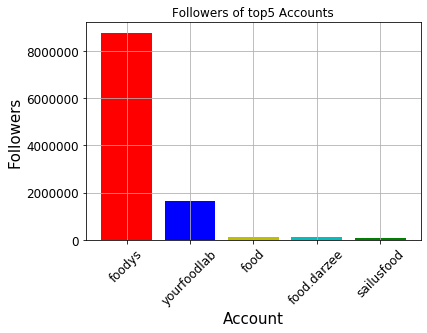

In [259]:
account = []
follower_count = []
for key,value in fllow_count_int.items():
    account.append(key)
    follower_count.append(value)
import matplotlib.pyplot as plt
plt.bar(account,follower_count,color="rbycg")
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.xlabel("Account",size = 15)
plt.ylabel("Followers",size = 15)
plt.grid()
plt.title('Followers of top5 Accounts')
plt.show()

In [260]:
post_count = []
for key,value in no_of_posts.items():
    post_count.append(value) 

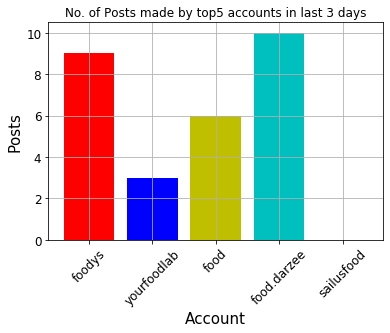

In [261]:
plt.bar(account,post_count,color="rbycg")
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.xlabel("Account",size = 15)
plt.ylabel("Posts",size = 15)
plt.grid()
plt.title('No. of Posts made by top5 accounts in last 3 days')
plt.show()

In [262]:
post_count_per_follower = []
for key,value in no_of_posts.items():
    post_count_per_follower.append(value/fllow_count_int[key])

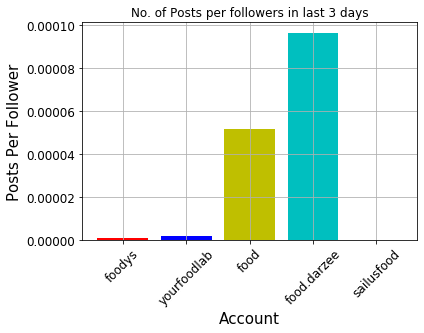

In [263]:
plt.bar(account,post_count_per_follower,color="rbycg")
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.xlabel("Account",size = 15)
plt.ylabel("Posts Per Follower",size = 15)
plt.grid()
plt.title('No. of Posts per followers in last 3 days')
plt.show()

# Scraping the Content of last 10 posts of the top5 accounts

In [264]:
base_url = 'https://www.instagram.com/'
all_links = []
for i in account:
    all_links.append(base_url + i)    

In [265]:
caption_account = {}
one_giant_text = ""
for i in account:
    caption_account[i] = []
for i in range(len(all_links)):
    count = 0
    driver.get(all_links[i])
    time.sleep(2)
    first_img = driver.find_element_by_class_name('_9AhH0')
    first_img.click()
    print(account[i],end=" ")
    while count < 10:
        time.sleep(2)
        caption = driver.find_element_by_xpath('//div[@class = "C4VMK"]/span')
        caption_text = caption.text
        one_giant_text = one_giant_text + " " + caption_text
        #print(count,end = ' ')
        print(caption_text)
        print("------------------------------------")
        caption_account[account[i]].append(caption_text)
        count = count + 1
        next_img = driver.find_element_by_xpath('//a[contains(@class,"coreSpriteRightPaginationArrow")]')
        next_img.click()        

foodys Pineapple and pork... what an unexpectedly brilliant combo 🍍🌳 @menwithth
------------------------------------
Loaded teriyaki chicken rice bowl! 🍛🔥 Perfect lunch 👌 @foodyfetish
------------------------------------
Matzoh icebox cake! The decadent dessert you need to get you through Passover 💪😋 Tag someone who needs to see this! 👇 @delish
------------------------------------
Foodys fam! Trying to keep you drooling all year and remove the bots! 🤤 #real421
------------------------------------
Fried chicken sandwiches will forever keep me drooling 🤤😫🔥 Who else is f*cking hungry right now? @devourpower
------------------------------------
Ultimate snack alert: Hot link breakfast sandwich wrap with chives and cheesy eggs! 🍳🌭🔥 @thejoshelkin
------------------------------------
Raspberry white chocolate blondes! These look gorgeous 😍👌 @fitwaffle
------------------------------------
IT’S RAINING DONUTS! 🍩☂ All I’ve ever wanted in life is to be showered in donuts 😅 @danilovx 🎶: @maroon5 #

When you want it all 😏 @auzaatar

📸: @creezyeats

#food #nycfood #nycfoodie #auzaatar #mediterraneanfood #mezze #yum #eat #zaatar
------------------------------------
Extra cheesy Mac and cheese @thesmithrestaurant 😍🧀

📸 @fork.and.spoon

#food #nycfood #nycfoodie #yummy #foodie #macandcheese #cheese #pasta #thesmith
------------------------------------
Our fav @ceremoniabakeshop is now taking pre-orders for their incredible HOT CROSS BUNS! they will be available for easter weekend fri-sun 4/2-4/5. reserve yours by calling or coming into the bakery by thursday 4/1. *pre-orders are by the half dozen for $22. DM @ceremoniabakeshop for more information!

#hotcrossbuns #easter #ceremonia #bakeshop #nyc #nycfood #nycfoodie #supportlocal #eatlocal
------------------------------------
The mozzarella sticks from @roeblingnyc 🧀😍

#mozzarella #mozzarellasticks #rsc #roebling #nyc #nycfood #nycfoodie #yummy #cheese
------------------------------------
Sunday Spread @sundayinbrooklyn

#sunday #spre

Relished desi ghee smeared roti with aloo tamatar sabji (no onion and no garlic) and dahi that's spiked with roasted cumin powder for breakfast.
.
.
For aloo tamatar sabji, peel a large potato and chop into 1/2" thin pieces. Chop a large tomato into small pieces. Heat 1 1/2 tbsps of oil in a pressure cooker, add 1/2 tsp cumin and let it crackle. Add 2 slit green chilies and the chopped potatoes and cook on low flame for 5 mins. Add turmeric powder, grated ginger (1/2 tsp), 1/2 tsp dhania powder, 1 tsp red chili powder and salt. Mix and cook for a min. Add chopped tomatoes and cook for 4-5 mins. Add a generous amount of chopped coriander, 1 cup water and pressure cook up to 2 whistles. Once the pressure eases, open the lid and simmer it for a few minutes if required. Add 1/4 tsp garam masala and fresh coriander and mix. .
.
.
.
#sailusfood #indianfood #northindianfood #lbreakfast #comfortfood #desikhana #aloosabji #breakfastofchamps #breakfastoftheday #ilovecooking #soulfood #foodtalkin

# Finding Frequency of Hashtags


In [266]:
from collections import Counter
import re
word_frequency = re.split('\s|\n|:',one_giant_text)
for i in range(len(a)):
    word_frequency[i] = word_frequency[i].strip('.')
    word_frequency[i] = word_frequency[i].strip('!')
    word_frequency[i] = word_frequency[i].strip('-')
    word_frequency[i] = word_frequency[i].strip('?')
    word_frequency[i] = word_frequency[i].strip('(')
    word_frequency[i] = word_frequency[i].strip(')')
word_frequency = Counter(word_frequency)
word_frequency = dict(word_frequency)
word_frequency.pop('')
word_frequency = dict(sorted(word_frequency.items(), key=operator.itemgetter(1),reverse=True))
hashtag_frequency = {}
for key,value in word_frequency.items():
    if key[0] == "#":
        hashtag_frequency[key] = value
    else:
        continue
hashtag_frequency        

{'#comfortfood': 12,
 '#indianfood': 11,
 '#keytoyournutrition': 10,
 '#keytoyourhealth': 10,
 '#wearehereforyou': 10,
 '#fooddarzee': 10,
 '#sailusfood': 10,
 '#nycfood': 9,
 '#nycfoodie': 9,
 '#walkwithindia': 9,
 '#foodtalkindia': 9,
 '#soulfood': 8,
 '#yummyinmytummy': 8,
 '#food': 7,
 '#foodporn': 6,
 '#ndtv_food': 6,
 '#sanjyotkeer': 5,
 '#yourfoodlab': 5,
 '#recipeoftheday': 5,
 '#foodstagram': 5,
 '#yummy': 5,
 '#southindianfood': 5,
 '#goodfoodindia': 5,
 '#breakfastofchamps': 5,
 '#northindianfood': 5,
 '#thefeedfeed': 5,
 '#foodiesofinstagram': 4,
 '#indiancuisine': 4,
 '#streetfood': 4,
 '#foodlover': 4,
 '#foodstylist': 4,
 '#foodpics': 4,
 '#recipevideo': 4,
 '#foodphotography': 4,
 '#eat': 4,
 '#healthytips': 4,
 '#coacheddarzee': 4,
 '#fooddarzeemeals': 4,
 '#eattherainbow': 4,
 '#veganfoodshare': 4,
 '#breakfastlover': 4,
 '#southindianbreakfast': 4,
 '#breakfastoftheday': 4,
 '#huffposttaste': 4,
 '#recipe': 3,
 '#cheese': 3,
 '#nyc': 3,
 '#simplefood': 3,
 '#authenti

# Frequencies of different words and converting it to a .csv file

In [278]:
import pandas as pd
df_word = pd.DataFrame(list(word_frequency.items()),columns=['Word','Frequency'])
df_word

,Word,Frequency
0,and,94
1,.,73
2,the,67
3,a,53
4,of,44
...,...,...
1287,#beautifulcuisines,1
1288,#indiansweets,1
1289,#indiancooking,1
1290,#traditionalsweets,1


In [269]:
df_word.to_csv("INSTA BOT 2(1).csv")

In [270]:
df_hashtag = pd.DataFrame(list(hashtag_frequency.items()),columns=['Hashtag','Frequency'])
df_hashtag

,Hashtag,Frequency
0,#comfortfood,12
1,#indianfood,11
2,#keytoyournutrition,10
3,#keytoyourhealth,10
4,#wearehereforyou,10
...,...,...
297,#beautifulcuisines,1
298,#indiansweets,1
299,#indiancooking,1
300,#traditionalsweets,1


# Seperating top5 hashtags and plotting a piechart for it

In [271]:
hashtag = list(df_hashtag['Hashtag'])
frequency = list(df_hashtag['Frequency'])

In [272]:
top5_hashtag = []
top5_frequency = []
for i in range(0,5):
    top5_hashtag.append(hashtag[i])
    top5_frequency.append(frequency[i]) 
for i in range(len(top5_hashtag)):
    print(str(top5_hashtag[i])+ " " + "occurs" + " " + str(top5_frequency[i]) + " " + "times")

#comfortfood occurs 12 times
#indianfood occurs 11 times
#keytoyournutrition occurs 10 times
#keytoyourhealth occurs 10 times
#wearehereforyou occurs 10 times


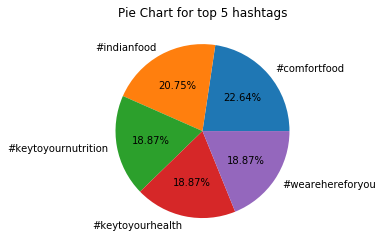

In [273]:
plt.pie(top5_frequency,labels = top5_hashtag,autopct='%.2f%%')
plt.title('Pie Chart for top 5 hashtags')
plt.show()

# Finding likes on last 10 posts of the top5 accounts

In [274]:
likes_top5_accounts = {}
for i in range(len(all_links)):
    count = 0
    driver.get(all_links[i])
    time.sleep(2)
    first_img = driver.find_element_by_class_name('_9AhH0')
    first_img.click()
    like_int = 0
    while count < 10:
        time.sleep(2)
        try:
            like_count = driver.find_element_by_xpath('//a[@class = "zV_Nj"]/span')
            like_str = like_count.get_attribute('innerHTML')
            like_int = float(like_str.replace(',','')) + like_int
            count = count + 1
        except NoSuchElementException:
            like_count = driver.find_element_by_xpath('//div[@class = "HbPOm _9Ytll"]/span/span')
            like_str = like_count.get_attribute('innerHTML')
            like_int = float(like_str.replace(',','')) + like_int
        next_img = driver.find_element_by_xpath('//a[contains(@class,"coreSpriteRightPaginationArrow")]')
        next_img.click()
    likes_top5_accounts[account[i]] = like_int    
likes_top5_accounts

{'foodys': 951489.0,
 'yourfoodlab': 2086576.0,
 'food': 7683.0,
 'food.darzee': 47169.0,
 'sailusfood': 30493.0}

# Calculating Average likes and Followers:Like Ratio for top5 accounts


In [275]:
average_likes_top5_accounts = {}
for key,value in likes_top5_accounts.items():
    average_likes_top5_accounts[key] = value/10
average_likes_top5_accounts    

{'foodys': 95148.9,
 'yourfoodlab': 208657.6,
 'food': 768.3,
 'food.darzee': 4716.9,
 'sailusfood': 3049.3}

In [276]:
likes_top5 = list(likes_top5_accounts.values())
like_follower_ratio = {}
follower_like_ratio = []
i = 0
for key,value in fllow_count_int.items():
    follower_like_ratio.append(value/likes_top5[i])
    like_follower_ratio[key] = value/likes_top5[i]
    i = i+1 
like_follower_ratio

{'foodys': 9.206548893366081,
 'yourfoodlab': 0.7773572589735528,
 'food': 15.040739294546402,
 'food.darzee': 2.1940257372426806,
 'sailusfood': 2.1726625782966584}

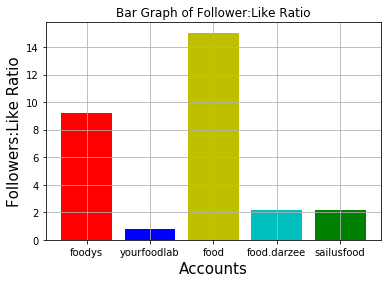

In [277]:
plt.bar(account,follower_like_ratio,color="rbycg")
plt.grid()
plt.title("Bar Graph of Follower:Like Ratio")
plt.xlabel("Accounts",size = 15)
plt.ylabel("Followers:Like Ratio",size=15)
plt.show()